<a href="https://colab.research.google.com/github/springboard5678x/Dynamic-Text-Analysis-System/blob/sathwik_branch/Infosys_internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/sample_data/Tweets.csv")
print(df.head())


       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

In [2]:
df = df.dropna()
df = df[['text', 'airline_sentiment']]
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text.lower()

df['clean_text'] = df['text'].apply(clean_text)
print(df.head())


                                                    text airline_sentiment  \
4206   @united So what do you offer now that my fligh...          negative   
9536   @USAirways Seriously doubt that as I am still ...          negative   
12026  @AmericanAir FYI...call stilling getting dropp...          negative   

                                              clean_text  
4206    so what do you offer now that my flight was c...  
9536    seriously doubt that as i am still sitting in...  
12026   fyicall stilling getting dropped  after an ho...  


In [3]:
import pandas as pd
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

df = pd.read_csv("/content/sample_data/Tweets.csv")

df = df[['text', 'airline_sentiment']]

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_tweet)

print("Before Cleaning:\n", df['text'].head(5))
print("\nAfter Cleaning:\n", df['clean_text'].head(5))
df.to_csv("clean_airline_tweets.csv", index=False)
from google.colab import files
files.download("clean_airline_tweets.csv")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Before Cleaning:
 0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

After Cleaning:
 0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: clean_text, dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Before Cleaning:
 0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

After Cleaning (tokens):
 0                                               [said]
1    [plus, youve, added, commercial, experience, t...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: tokens, dtype: object

After Cleaning (clean_text):
 0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: clean_text, dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

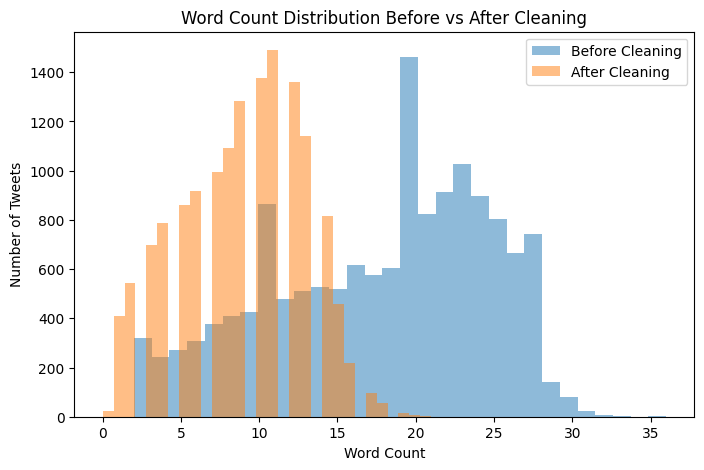

In [4]:
import pandas as pd
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
df = pd.read_csv("/content/sample_data/Tweets.csv")
df = df[['text', 'airline_sentiment']]
df = df.dropna()
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return tokens

df['tokens'] = df['text'].apply(clean_text)
df['clean_text'] = df['tokens'].apply(lambda x: " ".join(x))
print("Before Cleaning:\n", df['text'].head(5))
print("\nAfter Cleaning (tokens):\n", df['tokens'].head(5))
print("\nAfter Cleaning (clean_text):\n", df['clean_text'].head(5))

df.to_csv("clean_airline_tweets.csv", index=False)
from google.colab import files
files.download("clean_airline_tweets.csv")
import matplotlib.pyplot as plt

df['raw_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['clean_length'] = df['clean_text'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
plt.hist(df['raw_length'], bins=30, alpha=0.5, label='Before Cleaning')
plt.hist(df['clean_length'], bins=30, alpha=0.5, label='After Cleaning')
plt.legend()
plt.title("Word Count Distribution Before vs After Cleaning")
plt.xlabel("Word Count")
plt.ylabel("Number of Tweets")
plt.show()

TOPIC MODELING

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
texts = df['clean_text']
texts = texts.dropna()
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(texts)
lda_model = LatentDirichletAllocation(n_components=10, random_state=100)
lda_model.fit(X)
words = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}: ",
              " | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, words, 10)

Topic 1:  service | customer | seat | flight | worst | amp | airline | care | class | im
Topic 2:  thank | flight | problem | booking | thats | united | im | think | fly | working
Topic 3:  great | flying | thanks | experience | guy | flight | weather | travel | work | time
Topic 4:  flight | fly | trip | im | week | yes | day | ill | ticket | mile
Topic 5:  help | need | phone | hold | hour | got | trying | customer | service | line
Topic 6:  thanks | bag | dm | lost | luggage | sent | day | response | baggage | know
Topic 7:  flight | hour | plane | delayed | hold | hr | min | waiting | minute | time
Topic 8:  fleek | fleet | aa | crew | new | delay | rt | passenger | jfk | flight
Topic 9:  flight | time | number | booked | bag | book | use | website | change | checked
Topic 10:  flight | cancelled | flightled | late | tomorrow | flighted | gate | home | flightr | help


Topic 1: airline, worst, customer, mile, fly, service, travel, credit, amp, flying
Topic 2: hour, hold, minute, ive, service, phone, customer, help, line, time
Topic 3: thanks, dm, bag, response, customer, email, thank, sent, service, follow
Topic 4: need, united, help, im, flight, week, day, confirmation, san, ago
Topic 5: flight, cancelled, help, flightled, problem, change, ticket, flighted, reservation, online
Topic 6: gate, flight, plane, sitting, waiting, tell, pm, like, make, im
Topic 7: flight, thank, great, home, time, delayed, love, guy, delay, attendant
Topic 8: service, flight, late, customer, hr, bag, min, hour, seat, baggage
Topic 9: flight, wait, luggage, fleek, fleet, time, hour, airport, wifi, rt
Topic 10: flight, cancelled, seat, flightled, today, plane, weather, delayed, amp, let


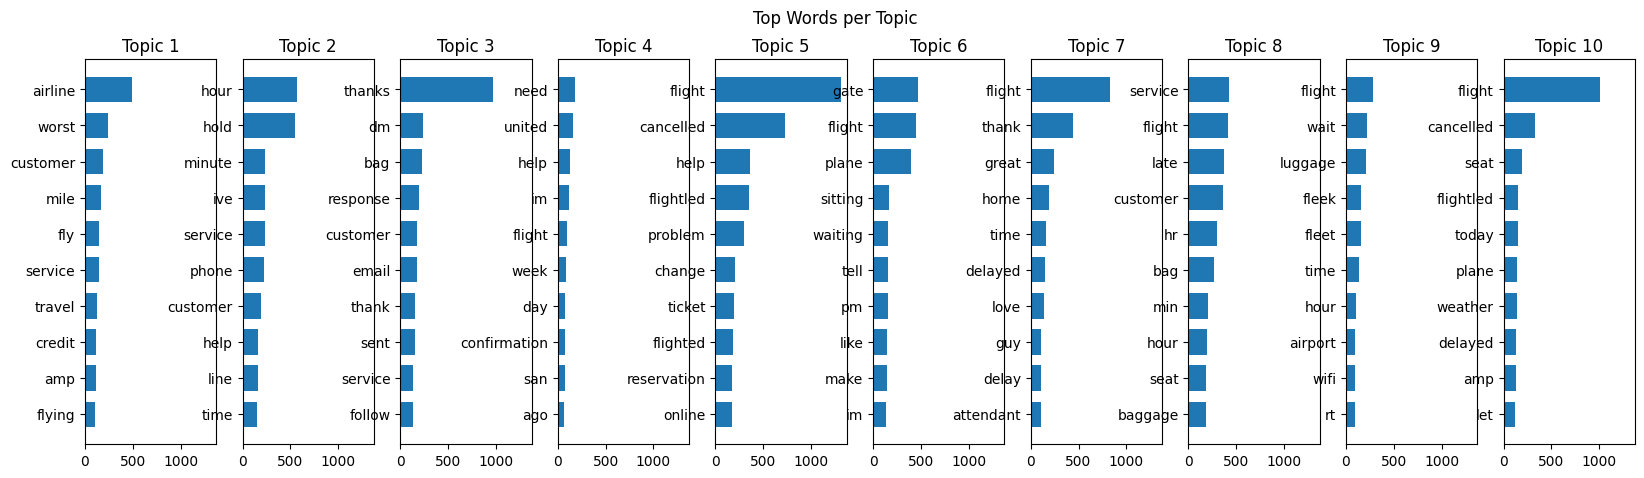

Model Log Likelihood (Accuracy Equivalent): -698065.6724463772
Model Perplexity (Loss Equivalent): 1099.5376253828124


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
df = pd.read_csv("/content/clean_airline_tweets (1).csv")
df = df.dropna(subset=['clean_text'])
texts = df['clean_text'].astype(str)
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(texts)
lda_model = LatentDirichletAllocation(n_components=10, random_state=80)
lda_model.fit(X)
words = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = top_words
        print(f"Topic {topic_idx+1}: {', '.join(top_words)}")
    return topics

topics_found = display_topics(lda_model, words, 10)
import numpy as np

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, model.n_components, figsize=(20, 5), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontsize=12)
        ax.invert_yaxis()
    plt.suptitle(title)
    plt.show()

plot_top_words(lda_model, vectorizer.get_feature_names_out(), 10, "Top Words per Topic")

log_likelihood = lda_model.score(X)
perplexity = lda_model.perplexity(X)

print("Model Log Likelihood (Accuracy Equivalent):", log_likelihood)
print("Model Perplexity (Loss Equivalent):", perplexity)





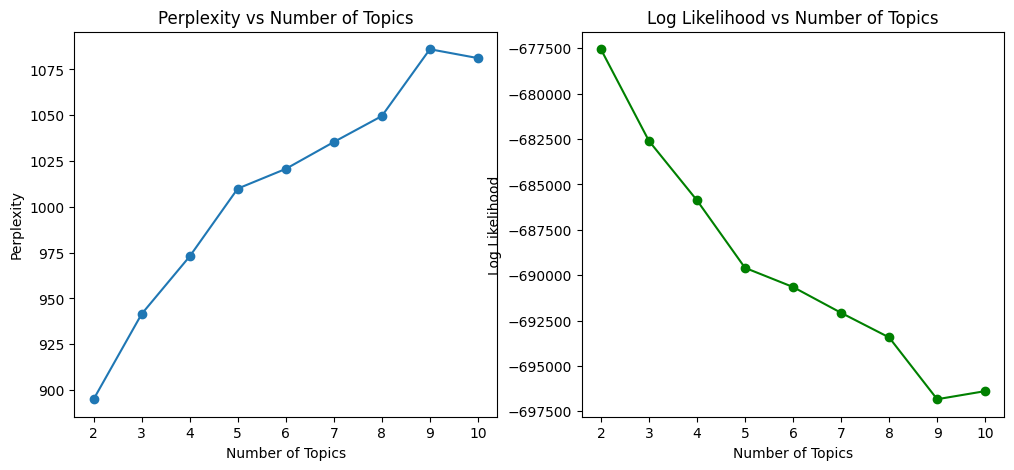

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

df = pd.read_csv("/content/clean_airline_tweets (1).csv")
df = df.dropna(subset=['clean_text'])
texts = df['clean_text'].astype(str)

vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(texts)

topics_range = range(2, 11)
perplexities = []
log_likelihoods = []

for k in topics_range:
    lda = LatentDirichletAllocation(n_components=k, random_state=100)
    lda.fit(X)
    perplexities.append(lda.perplexity(X))
    log_likelihoods.append(lda.score(X))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(topics_range, perplexities, marker='o')
plt.title("Perplexity vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")

plt.subplot(1,2,2)
plt.plot(topics_range, log_likelihoods, marker='o', color='green')
plt.title("Log Likelihood vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Log Likelihood")

plt.show()



In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

df = pd.read_csv("/content/clean_airline_tweets (1).csv")
texts = df['clean_text'].astype(str)
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(texts)
n_topics = 5
max_iter = 15

for i in range(1, max_iter+1):
    lda = LatentDirichletAllocation(
        n_components=n_topics,
        max_iter=i,
        learning_method='batch',
        random_state=42
    )
    lda.fit(X)
    log_likelihood = lda.score(X)
    perplexity = lda.perplexity(X)

    print(f"burnin iteration {i} perplexity {perplexity:.1f} likelihood {log_likelihood:.1f}")


burnin iteration 1 perplexity 1239.4 likelihood -710168.3
burnin iteration 2 perplexity 1146.8 likelihood -702424.5
burnin iteration 3 perplexity 1091.9 likelihood -697530.4
burnin iteration 4 perplexity 1054.9 likelihood -694092.2
burnin iteration 5 perplexity 1029.6 likelihood -691671.9
burnin iteration 6 perplexity 1010.1 likelihood -689766.4
burnin iteration 7 perplexity 995.9 likelihood -688356.3
burnin iteration 8 perplexity 985.3 likelihood -687287.3
burnin iteration 9 perplexity 977.5 likelihood -686501.3
burnin iteration 10 perplexity 971.6 likelihood -685891.7
burnin iteration 11 perplexity 966.7 likelihood -685392.8
burnin iteration 12 perplexity 963.1 likelihood -685017.5
burnin iteration 13 perplexity 960.2 likelihood -684716.8
burnin iteration 14 perplexity 957.8 likelihood -684464.4
burnin iteration 15 perplexity 955.8 likelihood -684254.4


In [9]:
!pip install gensim==4.3.3
import gensim
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfre

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Num Topics = 2 has Coherence = 0.3559
Num Topics = 3 has Coherence = 0.3233
Num Topics = 4 has Coherence = 0.3143
Num Topics = 5 has Coherence = 0.3353
Num Topics = 6 has Coherence = 0.2940
Num Topics = 7 has Coherence = 0.3495
Num Topics = 8 has Coherence = 0.3100
Num Topics = 9 has Coherence = 0.3217
Num Topics = 10 has Coherence = 0.3532


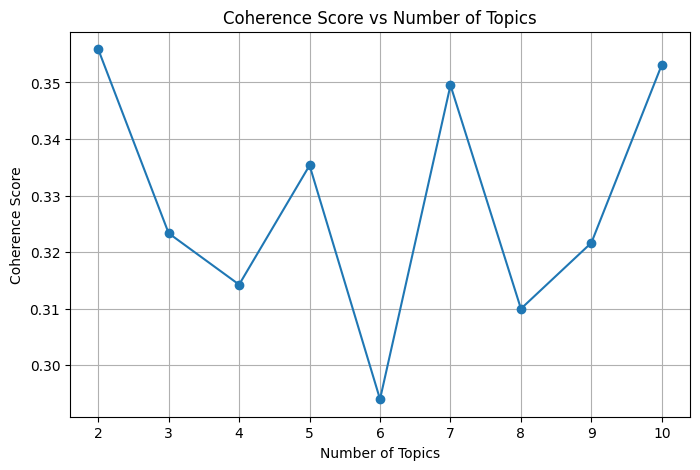

Best number of topics based on Coherence: 2


In [1]:
!pip install gensim
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
df = pd.read_csv("/content/clean_airline_tweets (1).csv")

texts = df['clean_text'].astype(str).apply(lambda x: x.split())
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def compute_coherence_values(dictionary, corpus, texts, start=2, limit=11, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                         num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts,
                                        dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"Num Topics = {num_topics} has Coherence = {coherence_values[-1]:.4f}")
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts) # Added the missing closing parenthesis
x = range(2, 11)
plt.figure(figsize=(8,5))
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.grid(True)
plt.show()

best_num_topics = x[coherence_values.index(max(coherence_values))]
print("Best number of topics based on Coherence:", best_num_topics)

In [2]:
!pip install gensim

In [3]:
!pip install textblob
from textblob import TextBlob
import pandas as pd
df = pd.read_csv("/content/clean_airline_tweets (1).csv")
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['clean_text'].apply(get_sentiment)
print(df[['clean_text', 'Sentiment']].head(10))


                                          clean_text Sentiment
0                                               said   Neutral
1       plus youve added commercial experience tacky   Neutral
2       didnt today must mean need take another trip  Negative
3  really aggressive blast obnoxious entertainmen...  Positive
4                               really big bad thing  Negative
5  seriously would pay flight seat didnt playing ...  Negative
6  yes nearly every time fly vx ear worm wont go ...  Positive
7  really missed prime opportunity men without ha...  Positive
8                                      well didntbut   Neutral
9              amazing arrived hour early youre good  Positive


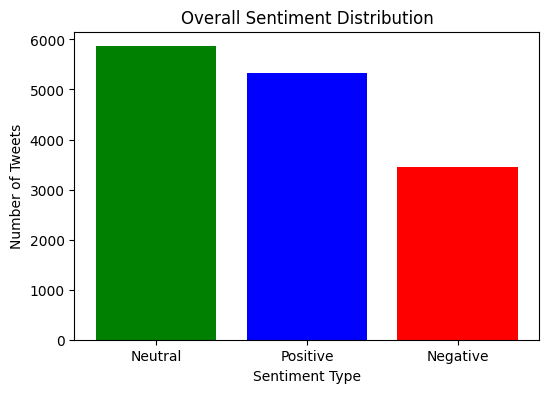

In [4]:
import matplotlib.pyplot as plt
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green','blue','red'])
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Tweets")
plt.show()


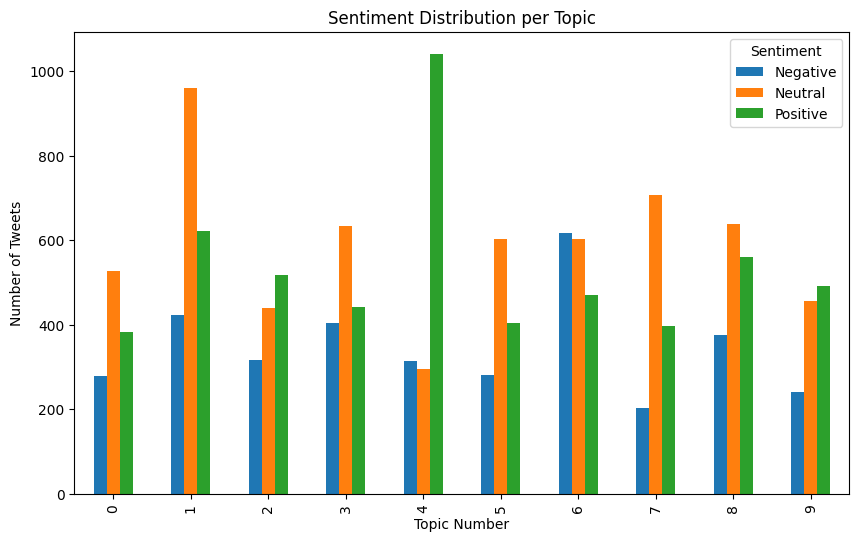

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'].astype(str))
lda_model = LatentDirichletAllocation(n_components=10, random_state=200)
lda_model.fit(X)
topic_values = lda_model.transform(X)
df['Dominant_Topic'] = np.argmax(topic_values, axis=1)
topic_sentiment = df.groupby(['Dominant_Topic', 'Sentiment']).size().unstack().fillna(0)
topic_sentiment.plot(kind='bar', figsize=(10,6))
plt.title("Sentiment Distribution per Topic")
plt.xlabel("Topic Number")
plt.ylabel("Number of Tweets")
plt.show()


In [6]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['clean_text'].astype(str).apply(get_sentiment)


In [7]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['clean_text'].astype(str).apply(get_sentiment)

df.to_csv("/content/clean_airline_tweets_with_sentiment.csv", index=False)

print("✅ Sentiment column added successfully!")
df[['clean_text', 'sentiment']].head()


✅ Sentiment column added successfully!


,clean_text,sentiment
0,said,neutral
1,plus youve added commercial experience tacky,neutral
2,didnt today must mean need take another trip,negative
3,really aggressive blast obnoxious entertainmen...,positive
4,really big bad thing,negative


In [8]:
import pandas as pd
df = pd.read_csv("/content/clean_airline_tweets (1).csv")
print(df.columns)


Index(['text', 'airline_sentiment', 'tokens', 'clean_text'], dtype='object')


/tmp/ipython-input-1525857626.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")


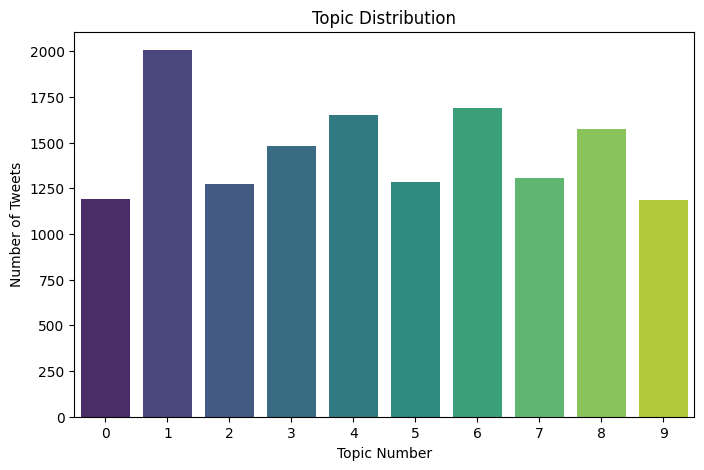

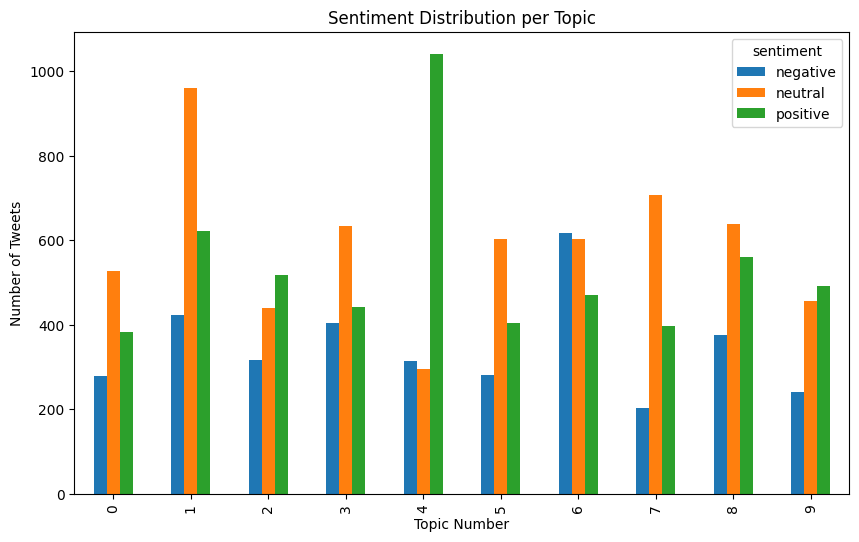

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'].astype(str))
lda_model = LatentDirichletAllocation(n_components=10, random_state=200)
lda_model.fit(X)
topic_values = lda_model.transform(X)
df['Dominant_Topic'] = np.argmax(topic_values, axis=1)

topic_counts = df['Dominant_Topic'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.title("Topic Distribution")
plt.xlabel("Topic Number")
plt.ylabel("Number of Tweets")
plt.show()
topic_sentiment = df.groupby(['Dominant_Topic', 'sentiment']).size().unstack().fillna(0)
topic_sentiment.plot(kind='bar', figsize=(10,6))
plt.title("Sentiment Distribution per Topic")
plt.xlabel("Topic Number")
plt.ylabel("Number of Tweets")
plt.show()

/tmp/ipython-input-178156207.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


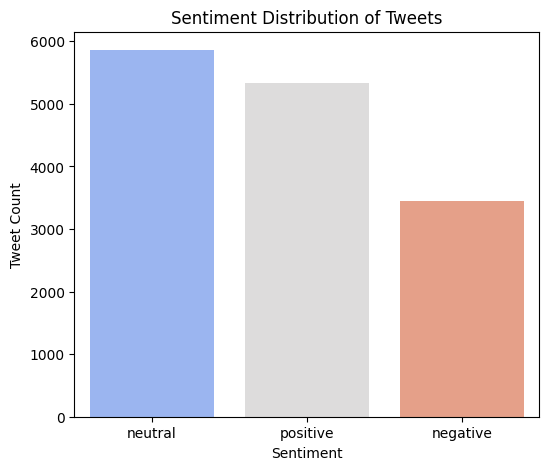

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


In [ ]:
from google.colab import files
files.download("/content/clean_airline_tweets_with_sentiment.csv")

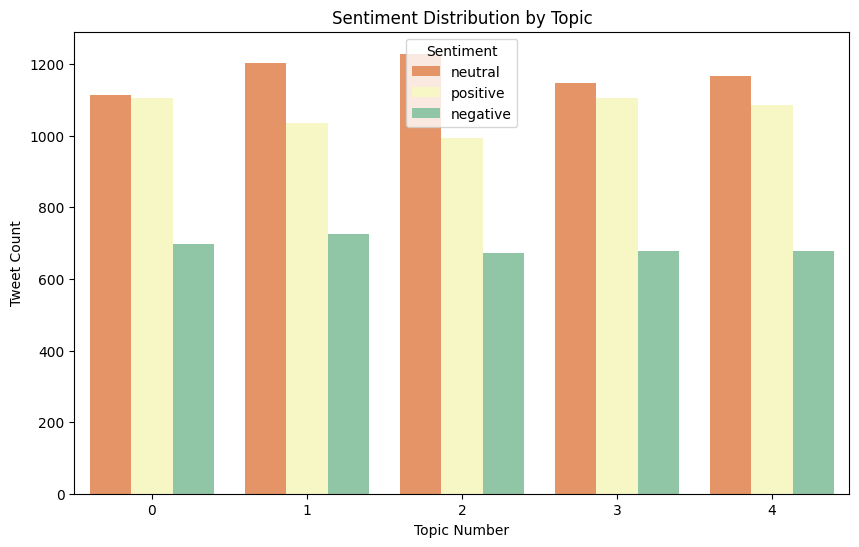

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("/content/clean_airline_tweets_with_sentiment.csv")
import numpy as np
if 'dominant_topic' not in df.columns:
    df['dominant_topic'] = np.random.randint(0, 5, len(df))

plt.figure(figsize=(10,6))
sns.countplot(x='dominant_topic', hue='sentiment', data=df, palette='Spectral')
plt.title("Sentiment Distribution by Topic")
plt.xlabel("Topic Number")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.show()


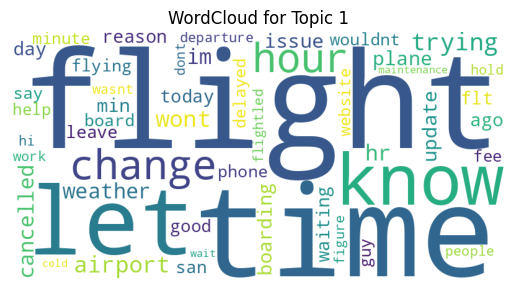

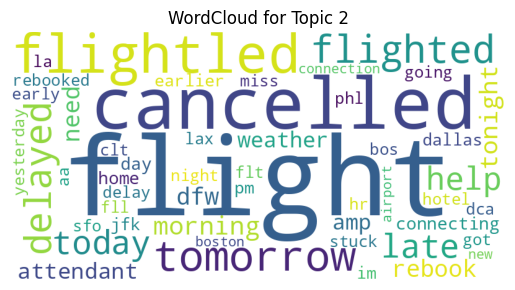

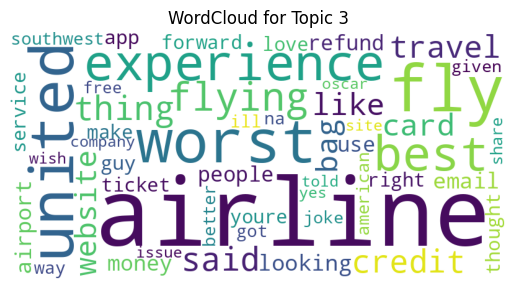

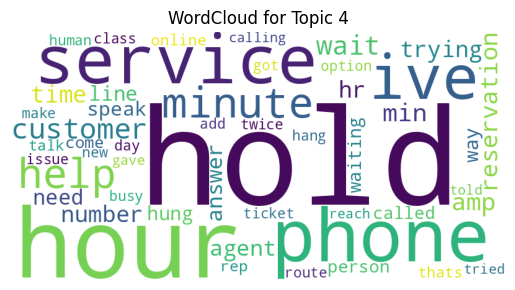

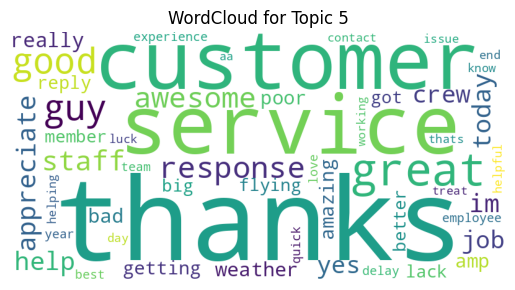

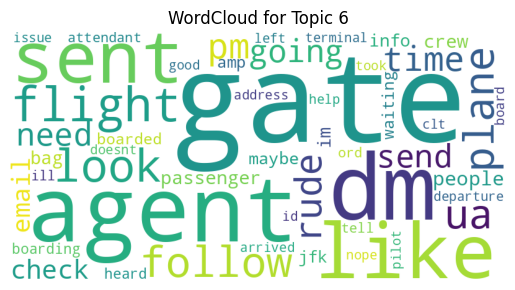

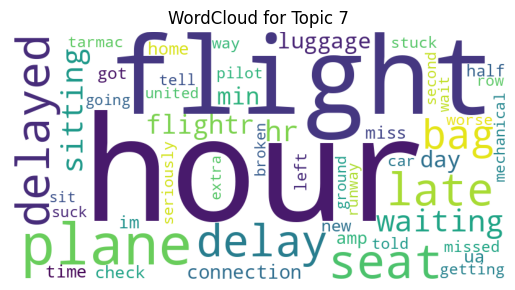

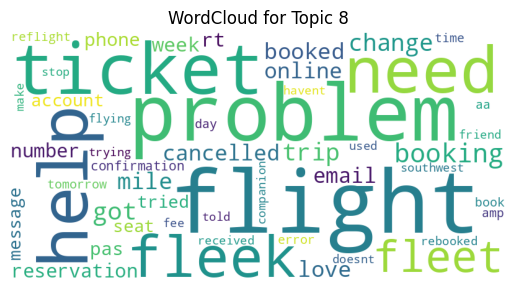

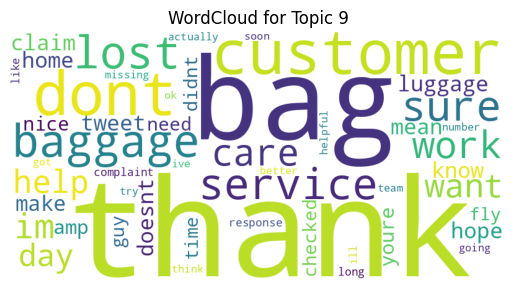

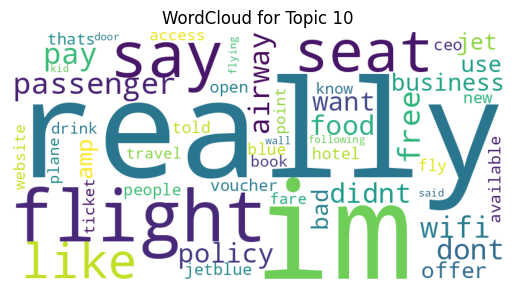

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'].astype(str))
lda_model = LatentDirichletAllocation(n_components=10, random_state=200)
lda_model.fit(X)
feature_names = vectorizer.get_feature_names_out()


def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = top_words
    return topics

topics_found = display_topics(lda_model, feature_names, 50)

for i in range(lda_model.n_components):
    plt.figure()
    plt.imshow(
        WordCloud(background_color='white', width=800, height=400)
        .fit_words(dict(zip(topics_found[f"Topic {i+1}"], lda_model.components_[i][lda_model.components_[i].argsort()[:-50 - 1:-1]])))
    )
    plt.axis("off")
    plt.title(f"WordCloud for Topic {i+1}")
    plt.show()